# Foodback Food Image Classification Model

## A. Summary & How to Use
This model use to classify image based on the input. By using the model, will predict which class the food in the image belongs to among the 114 classes modeled.

## B. How to Make the Model?

### i. Data Pre-processing

1. Load the dataset from local using `os` library. 
2. Check the class name to be modeled
3. Image Augmentation
Image augmentation is a method to avoid overfitting and a way to enrich our dataset by modifying existing training examples to create new training examples. Use `Image Data Generator` for Image Augmentation. 

### ii. Modelling Process

1. Define the model. In this scoop, the model uses:
  - 2 layers of Keras Dropout layer, and
  - 3 layers of Keras Dense layer. 

The activation function used in the model is `ReLu` for the first two layers of Keras Dense layer and the activation function for the third Keras Dense layer is `softmax` used to do multi-class classification.
 
2. Define the model input and output. 
3. Compile the model. The loss function used in this model is the `categorical_crossentropy`. To fit this model better, `Adam` is used for optimization and `accuracy` as the metric.  
4. Fit the model with epoch of 30. 

### iii. Evaluation 

1. Plot the accuracy of both the train set and the test set in the epoch. Evaluate model from accuracy  fluctuations and movement to decide if the model is well-fit or not.

2. Plot the loss of both the train set and the test set in the epoch. Evaluate model from loss fluctuations and movement to decide if the model is well-fit or not.

### iv. Save the model 

Save the best model into TFlite format for deployment stage, retraining or just to load and make some predictions with the model.

## C. Data Pre-processing

### i. Load Libraries
Load the libraries needed by using import.

In [2]:
# Import Data Science Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import tensorflow as tf
import random
import cv2

# Tensorflow Libraries
from tensorflow import keras
from tensorflow.keras import layers,models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import Callback, EarlyStopping,ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import Model
from tensorflow.keras.layers.experimental import preprocessing

# System libraries
from pathlib import Path
import os.path

# Metrics
import itertools

### ii. Load Dataset
Load the dataset from the dataset folder from local  using `os`.

### iii. Check Class Name
Check classes to be modeled. In this dataset there is 114 class to be modelled. 

### iv.Image Augmentation
Image augmentation is a method to avoid overfitting and a way to enrich our dataset by modifying existing training examples to create new training examples. Use `Image Data Generator` for Image Augmentation.

In [11]:
# Check Class Names
CLASS_NAMES = os.listdir("C:/Users/LENOVO/food")
CLASS_NAMES

['apple',
 'apple_pie',
 'avocado',
 'ayam_crispy',
 'ayam_goreng',
 'ayam_pop',
 'banana',
 'beach plum',
 'bibimbap',
 'black berry',
 'blueberry',
 'bread_pudding',
 'cannoli',
 'carrot_cake',
 'cashew',
 'cheesecake',
 'cherry',
 'chicken_curry',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'club_sandwich',
 'cocoa bean',
 'coconut',
 'coffee',
 'corn kernel',
 'cranberry',
 'creme_brulee',
 'cup_cakes',
 'daging_rendang',
 'date',
 'dendeng_batokok',
 'donuts',
 'dragonfruit',
 'durian',
 'eggplant',
 'french_fries',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'galia melon',
 'garlic_bread',
 'grape',
 'grapefruit',
 'greek_salad',
 'grilled_salmon',
 'guava',
 'gulai_ikan',
 'gulai_tambusu',
 'gulai_tunjang',
 'gyoza',
 'hamburger',
 'honeyberry',
 'hot_and_sour_soup',
 'hot_dog',
 'ice_cream',
 'jackfruit',
 'jalapeno',
 'kiwi',
 'langsat',
 'lasagna',
 'lemon',
 'lime',
 'lobster_roll_sandwich',
 'lychee',
 'macaroni_and_cheese',
 'macarons',


In [51]:
# Import Trained Model 
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

In [40]:
train_generator = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v3.preprocess_input,
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

test_generator = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v3.preprocess_input,
    rescale=1. / 255
)

In [42]:
# Split the data into three categories.
train_images = train_generator.flow_from_directory(
    'C:/Users/LENOVO/train/',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_generator.flow_from_directory(
    'C:/Users/LENOVO/train/',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_generator.flow_from_directory(
    'C:/Users/LENOVO/test/',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 64881 images belonging to 114 classes.
Found 16189 images belonging to 114 classes.
Found 27043 images belonging to 114 classes.


In [31]:
# Resize Layer
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(224,224),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [7]:
checkpoint_callback = ModelCheckpoint(filepath='C:/Users/LENOVO/',
                                      save_weights_only=True,
                                      monitor="val_accuracy",
                                      save_best_only=True)

In [8]:
# Setup EarlyStopping callback to stop training if model's val_loss doesn't improve for 3 epochs
early_stopping = EarlyStopping(monitor = "val_loss", # watch the val loss metric
                               patience = 5,
                               restore_best_weights = True) # if val loss decreases for 3 epochs in a row, stop training

In [36]:
# Load the pretained model
pretrained_model = tf.keras.applications.MobileNetV3Large(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

## D. Modelling Process

1. Define the model. In this scoop, the model uses:
  - 2 layers of Keras Dropout layer, and
  - 3 layers of Keras Dense layer. 

 The activation function used in the model is `ReLu` for the first two layers of Keras Dense layer and the activation function for the third Keras Dense layer is `softmax` used to do multi-class classification.

2. Define the model input and output.

In [ ]:
# Define Model
inputs = pretrained_model.input
x = resize_and_rescale(inputs)
#x = pretrained_model.output
x = Dense(256, activation='relu')(pretrained_model.output)
x = Dropout(0.2)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.2)(x)

# Define Input & Output
outputs = Dense(114, kernel_regularizer=regularizers.l2(0.005), activation='softmax')(x)
model = Model(inputs=inputs, outputs=outputs)

3. Compile the model. The loss function used in this model is the `categorical_crossentropy`. To fit this model better, `Adam` is used for optimization and `accuracy` as the metric.  

In [38]:
model.compile(
    optimizer=Adam(0.00001), loss='categorical_crossentropy', metrics=['accuracy']
)

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_6 (Rescaling)        (None, 224, 224, 3)  0           ['input_4[0][0]']                
                                                                                                  
 Conv (Conv2D)                  (None, 112, 112, 16  432         ['rescaling_6[0][0]']            
                                )                                                                 
                                                                                            

                                                                                                  
 expanded_conv_2/depthwise/Batc  (None, 56, 56, 72)  288         ['expanded_conv_2/depthwise[0][0]
 hNorm (BatchNormalization)                                      ']                               
                                                                                                  
 re_lu_122 (ReLU)               (None, 56, 56, 72)   0           ['expanded_conv_2/depthwise/Batch
                                                                 Norm[0][0]']                     
                                                                                                  
 expanded_conv_2/project (Conv2  (None, 56, 56, 24)  1728        ['re_lu_122[0][0]']              
 D)                                                                                               
                                                                                                  
 expanded_

                                                                                                  
 re_lu_127 (ReLU)               (None, 28, 28, 120)  0           ['expanded_conv_4/depthwise/Batch
                                                                 Norm[0][0]']                     
                                                                                                  
 expanded_conv_4/squeeze_excite  (None, 1, 1, 120)   0           ['re_lu_127[0][0]']              
 /AvgPool (GlobalAveragePooling                                                                   
 2D)                                                                                              
                                                                                                  
 expanded_conv_4/squeeze_excite  (None, 1, 1, 32)    3872        ['expanded_conv_4/squeeze_excite/
 /Conv (Conv2D)                                                  AvgPool[0][0]']                  
          

                                                                                                  
 expanded_conv_5/project/BatchN  (None, 28, 28, 40)  160         ['expanded_conv_5/project[0][0]']
 orm (BatchNormalization)                                                                         
                                                                                                  
 expanded_conv_5/Add (Add)      (None, 28, 28, 40)   0           ['expanded_conv_4/Add[0][0]',    
                                                                  'expanded_conv_5/project/BatchNo
                                                                 rm[0][0]']                       
                                                                                                  
 expanded_conv_6/expand (Conv2D  (None, 28, 28, 240)  9600       ['expanded_conv_5/Add[0][0]']    
 )                                                                                                
          

 a)                                                                                               
                                                                                                  
 multiply_64 (Multiply)         (None, 14, 14, 200)  0           ['expanded_conv_7/depthwise/Batch
                                                                 Norm[0][0]',                     
                                                                  'tf.math.multiply_91[0][0]']    
                                                                                                  
 expanded_conv_7/project (Conv2  (None, 14, 14, 80)  16000       ['multiply_64[0][0]']            
 D)                                                                                               
                                                                                                  
 expanded_conv_7/project/BatchN  (None, 14, 14, 80)  320         ['expanded_conv_7/project[0][0]']
 orm (Batc

                                                                                                  
 expanded_conv_9/depthwise/Batc  (None, 14, 14, 184)  736        ['expanded_conv_9/depthwise[0][0]
 hNorm (BatchNormalization)                                      ']                               
                                                                                                  
 tf.__operators__.add_95 (TFOpL  (None, 14, 14, 184)  0          ['expanded_conv_9/depthwise/Batch
 ambda)                                                          Norm[0][0]']                     
                                                                                                  
 re_lu_139 (ReLU)               (None, 14, 14, 184)  0           ['tf.__operators__.add_95[0][0]']
                                                                                                  
 tf.math.multiply_95 (TFOpLambd  (None, 14, 14, 184)  0          ['re_lu_139[0][0]']              
 a)       

 expanded_conv_10/squeeze_excit  (None, 14, 14, 480)  0          ['multiply_70[0][0]',            
 e/Mul (Multiply)                                                 'tf.math.multiply_98[0][0]']    
                                                                                                  
 expanded_conv_10/project (Conv  (None, 14, 14, 112)  53760      ['expanded_conv_10/squeeze_excite
 2D)                                                             /Mul[0][0]']                     
                                                                                                  
 expanded_conv_10/project/Batch  (None, 14, 14, 112)  448        ['expanded_conv_10/project[0][0]'
 Norm (BatchNormalization)                                       ]                                
                                                                                                  
 expanded_conv_11/expand (Conv2  (None, 14, 14, 672)  75264      ['expanded_conv_10/project/BatchN
 D)       

 D)                                                                                               
                                                                                                  
 expanded_conv_12/expand/BatchN  (None, 14, 14, 672)  2688       ['expanded_conv_12/expand[0][0]']
 orm (BatchNormalization)                                                                         
                                                                                                  
 tf.__operators__.add_102 (TFOp  (None, 14, 14, 672)  0          ['expanded_conv_12/expand/BatchNo
 Lambda)                                                         rm[0][0]']                       
                                                                                                  
 re_lu_146 (ReLU)               (None, 14, 14, 672)  0           ['tf.__operators__.add_102[0][0]'
                                                                 ]                                
          

 tf.math.multiply_105 (TFOpLamb  (None, 7, 7, 960)   0           ['re_lu_149[0][0]']              
 da)                                                                                              
                                                                                                  
 multiply_75 (Multiply)         (None, 7, 7, 960)    0           ['expanded_conv_13/expand/BatchNo
                                                                 rm[0][0]',                       
                                                                  'tf.math.multiply_105[0][0]']   
                                                                                                  
 expanded_conv_13/depthwise (De  (None, 7, 7, 960)   24000       ['multiply_75[0][0]']            
 pthwiseConv2D)                                                                                   
                                                                                                  
 expanded_

                                                                                                  
 expanded_conv_14/depthwise/Bat  (None, 7, 7, 960)   3840        ['expanded_conv_14/depthwise[0][0
 chNorm (BatchNormalization)                                     ]']                              
                                                                                                  
 tf.__operators__.add_109 (TFOp  (None, 7, 7, 960)   0           ['expanded_conv_14/depthwise/Batc
 Lambda)                                                         hNorm[0][0]']                    
                                                                                                  
 re_lu_153 (ReLU)               (None, 7, 7, 960)    0           ['tf.__operators__.add_109[0][0]'
                                                                 ]                                
                                                                                                  
 tf.math.m

Total params: 3,337,458
Trainable params: 341,106
Non-trainable params: 2,996,352
__________________________________________________________________________________________________


In [11]:
import datetime

def create_tensorboard_callback(dir_name, experiment_name):
  """
  Creates a TensorBoard callback instand to store log files.

  Stores log files with the filepath:
    "dir_name/experiment_name/current_datetime/"

  Args:
    dir_name: target directory to store TensorBoard log files
    experiment_name: name of experiment directory (e.g. efficientnet_model_1)
  """
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback


4. Fit the model with epoch of 100. 

In [39]:
history = model.fit(
    train_images,
    steps_per_epoch=len(train_images)//32,
    validation_data=val_images,
    validation_steps=len(val_images)//32,
    epochs=100,
    verbose = 1,
    callbacks=[csv_logger, checkpointer]
)

Epoch 1/100
63/63 [==============================] - ETA: 0s - loss: 5.6468 - accuracy: 0.0069
Epoch 1: val_loss did not improve from 5.32938
63/63 [==============================] - 30s 417ms/step - loss: 5.6468 - accuracy: 0.0069 - val_loss: 5.6384 - val_accuracy: 0.0021
Epoch 2/100
63/63 [==============================] - ETA: 0s - loss: 5.6416 - accuracy: 0.0099
Epoch 2: val_loss did not improve from 5.32938
63/63 [==============================] - 26s 418ms/step - loss: 5.6416 - accuracy: 0.0099 - val_loss: 5.5805 - val_accuracy: 0.0146
Epoch 3/100
63/63 [==============================] - ETA: 0s - loss: 5.6202 - accuracy: 0.0114
Epoch 3: val_loss did not improve from 5.32938
63/63 [==============================] - 27s 427ms/step - loss: 5.6202 - accuracy: 0.0114 - val_loss: 5.5325 - val_accuracy: 0.0125
Epoch 4/100
63/63 [==============================] - ETA: 0s - loss: 5.6013 - accuracy: 0.0064
Epoch 4: val_loss did not improve from 5.32938
63/63 [=============================

KeyboardInterrupt: 

## E. Evaluation 
Evaluation process aims to evaluate how the model works, and how the model converges through each epoch. There are two graphs to be made, the accuracy plot, and the loss plot.

### i. Accuracy Plotting
Plot the accuracy of both the train set and the test set in the epoch. Evaluate model from accuracy  fluctuations and movement to decide if the model is well-fit or not.

In this case, the graph shows that the accuracy is increasing in both train and test set. This means that the model is well-fit. Based in the model history, the model reach 81.64 % on training accuracy and 78.81% on validation accuracy.

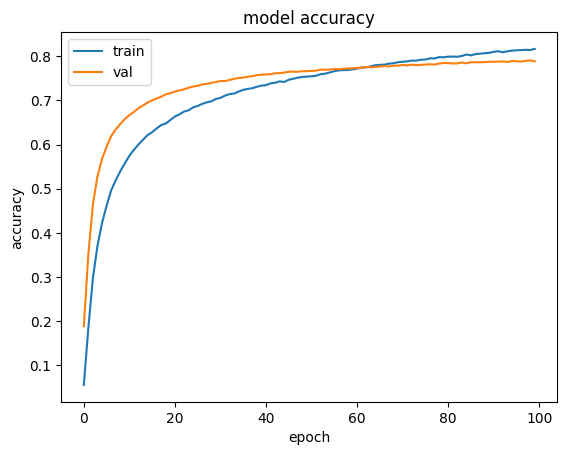

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### ii. Loss Plotting
Plot the loss of both the train set and the test set in the epoch. Evaluate model from loss fluctuations and movement to decide if the model is well-fit or not.

In this case, the graph shows that the loss is decreasing in both train and test set. This means that the model is well-fit. Based in the model history, the model reach 0.6217 on training loss and 0.7400 on validation loss. 

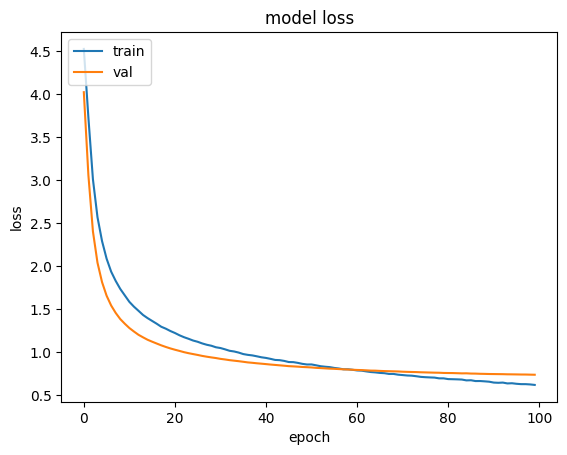

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## F. Save the model

Save the model into TFlite format for deployment stage, retraining or just to load and make some predictions with the model.

In [21]:
model.save('mobilenet.tflite')

INFO:tensorflow:Assets written to: mobilenet.tflite\assets


INFO:tensorflow:Assets written to: mobilenet.tflite\assets


In [22]:
saved_model_path = './mobilenet'
tf.saved_model.save(model, saved_model_path)

INFO:tensorflow:Assets written to: ./mobilenet\assets


INFO:tensorflow:Assets written to: ./mobilenet\assets


In [23]:
model_mobilenet = tf.saved_model.load(saved_model_path)

# Convert the model to TFLite format
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_path)
tflite_model = converter.convert()

# Save the TFLite model to a file
with open('./mobilenet/mobilenet.tflite', 'wb') as f:
    f.write(tflite_model)

## G. Conclusion
Based on the evaluation metric, the model made was well-fit with 81.64 % on training accuracy and 78.81% on validation accuracy. So we can use this model to predict our new image.